# Trabajo Práctico 1 - Procesamiento de Imágenes

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import os
from skimage.metrics import peak_signal_noise_ratio as psnr

## 1. Modos de color en imágenes

In [2]:
def printImg(img, gray = False, hsv = False):
    if gray == True:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)
    elif hsv:
        plt.imshow(img)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def readImg(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

### Ejercicio 6

> La conversión de una imagen de color a escala de grises se puede hacer de varias formas. El ejercicio consiste en convertir la imagen de Lenna color a escala de grises utilizando diferentes metodos.



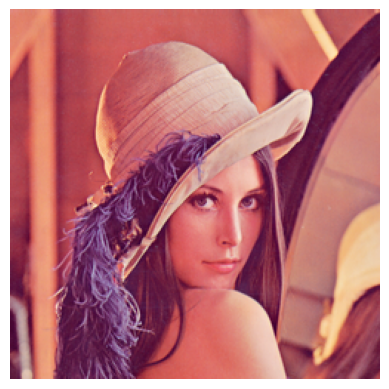

In [3]:
imagen_lenna = readImg('./imagenes/Lenna.png')

if imagen_lenna is None:
    print("Error al cargar la imagen.")
else:
    printImg(imagen_lenna)

#### Método 1
<a id='e1-6a'></a>
> Usando la libreria cv2 y el método cvtColor()



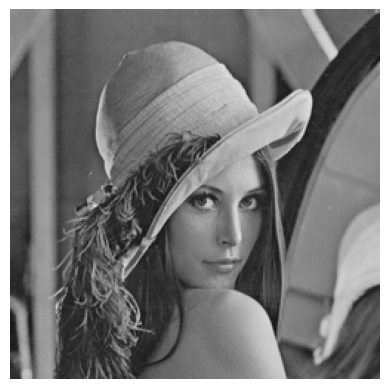

In [4]:
imagen_lenna = cv2.imread('./imagenes/Lenna.png', cv2.COLOR_BGR2RGB)

if imagen_lenna is not None:
  imagen_lenna_gris = cv2.cvtColor(imagen_lenna, cv2.COLOR_RGB2GRAY)
  printImg(imagen_lenna_gris,gray = True)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")

#### Método 2

> Usando la fórmula de luminancia

Según https://www.uv.es/gpoei/eng/Pfc_web/generalidades/grises/grey.htm, la ecuación a utilizar es $Y = R*0.3+G*0.59+B*0.11$.



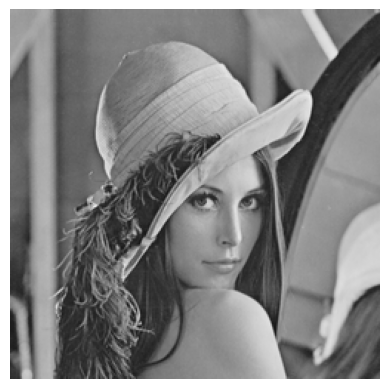

In [5]:
if imagen_lenna is not None:
  b, g, r = cv2.split(imagen_lenna)

  imagen_lenna_gris_luminancia = 0.3 * r + 0.59 * g + 0.11 * b
  imagen_lenna_gris_luminancia = imagen_lenna_gris_luminancia.astype(np.uint8)

  printImg(imagen_lenna_gris_luminancia, gray=True)

else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


#### Método 3

> Usando scickit-image y el método rgb2gray()

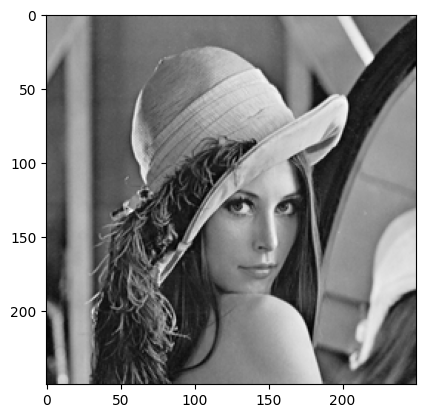

In [6]:
if imagen_lenna is not None:
  imagen_lenna_rgb = cv2.cvtColor(imagen_lenna, cv2.COLOR_BGR2RGB)
  imagen_lenna_gris_scikit = rgb2gray(imagen_lenna_rgb)
  plt.imshow(imagen_lenna_gris_scikit, cmap='gray')
  plt.show()
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


#### Pregunta 1


> ¿Qué pasa con los canales?

In [7]:
if imagen_lenna is not None:
  print("Imagen Lenna (color):", imagen_lenna.shape)
  print("Imagen Lenna en escala de grises (cv2.cvtColor):", imagen_lenna_gris.shape)
  print("Imagen Lenna en escala de grises (Luminancia):", imagen_lenna_gris_luminancia.shape)
  print("Imagen Lenna en escala de grises (scikit-image):", imagen_lenna_gris_scikit.shape)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


Imagen Lenna (color): (250, 250, 3)
Imagen Lenna en escala de grises (cv2.cvtColor): (250, 250)
Imagen Lenna en escala de grises (Luminancia): (250, 250)
Imagen Lenna en escala de grises (scikit-image): (250, 250)


Como es posible observar, la imagen original conserva sus tres canales (BGR) mientras que las versiones en escalas en grises poseen un único canal.

#### Pregunta 2

>  ¿Qué profundidad de bits tiene la imagen?

In [8]:
if imagen_lenna is not None:
  print("Profundidad de color de la imagen Lenna (color):", imagen_lenna.dtype)
  print("Profundidad de color de la imagen Lenna en escala de grises (cv2.cvtColor):", imagen_lenna_gris.dtype)
  print("Profundidad de color de la imagen Lenna en escala de grises (Luminancia):", imagen_lenna_gris_luminancia.dtype)
  print("Profundidad de color de la imagen Lenna en escala de grises (scikit-image):", imagen_lenna_gris_scikit.dtype)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


Profundidad de color de la imagen Lenna (color): uint8
Profundidad de color de la imagen Lenna en escala de grises (cv2.cvtColor): uint8
Profundidad de color de la imagen Lenna en escala de grises (Luminancia): uint8
Profundidad de color de la imagen Lenna en escala de grises (scikit-image): float64


La imagen a color tiene una profundidad de 24 bits, 8 por cada canal.

Las dos primeras imágenes en escala de grises tienen una profundidad de 8 bits, un único canal.

La última imagen está en formato `float64`, lo que indica una profundidad de 64 bits en punto flotante.

### Ejercicio 7

> Convertir la imagen de Lenna a otros modos de color, como CMYK, HSV, HSL. Mostrar el
resultado.

Imagen original (RGB):


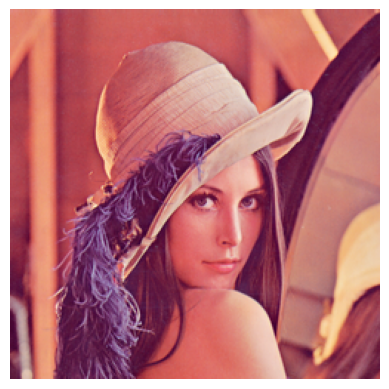

Imagen en HSV:


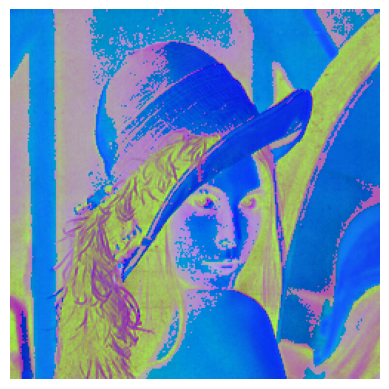

Imagen en HSL:


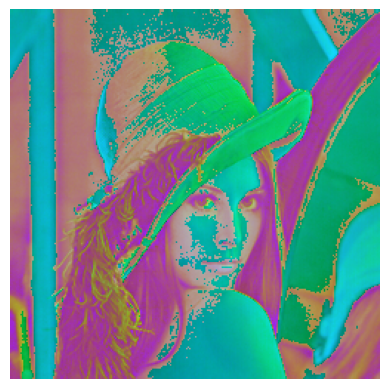

Imagen en CMYK:


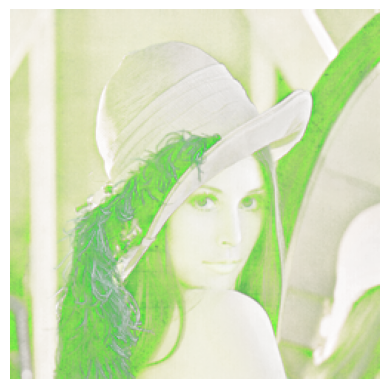

In [9]:
imagen_lenna = readImg('./imagenes/Lenna.png')

if imagen_lenna is not None:
    # Mostrar imagen original
    print("Imagen original (RGB):")
    printImg(imagen_lenna)

    # Convertir a HSV
    imagen_hsv = cv2.cvtColor(imagen_lenna, cv2.COLOR_RGB2HSV)
    print("Imagen en HSV:")
    printImg(imagen_hsv,hsv=True)

    # Convertir a HSL
    imagen_hsl = cv2.cvtColor(imagen_lenna, cv2.COLOR_RGB2HLS)
    print("Imagen en HSL:")
    printImg(imagen_hsl)

    # Normalizar imagen BGR a rango [0, 1]
    bgr_normalized = imagen_lenna.astype(float) / 255.0
    b = bgr_normalized[:, :, 0]
    g = bgr_normalized[:, :, 1]
    r = bgr_normalized[:, :, 2]

    # Calcular el componente K
    k = 1 - np.max(bgr_normalized, axis=2)

    # Evitar división por cero
    c = (1 - r - k) / (1 - k + 1e-10)
    m = (1 - g - k) / (1 - k + 1e-10)
    y = (1 - b - k) / (1 - k + 1e-10)

    # Unir canales y escalar a 255 para visualización
    cmyk = np.stack((c, m, y, k), axis=2)
    cmyk_image = (cmyk*255).astype(np.uint8)

    # Mostrar la imagen CMYK
    print("Imagen en CMYK:")
    printImg(cmyk_image)

else:
    print("Error: imagen_lenna no se ha cargado correctamente.")

### Ejercicio 8

> Tomar la imagen convertida en escala de grises y volver a convertir al en modo RGB. ¿Qué ha sucedido?

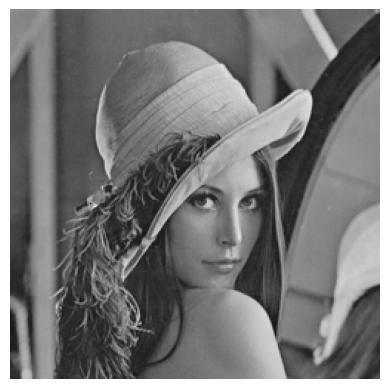

In [10]:
if imagen_lenna is not None:
  imagen_lenna_gris_a_rgb = cv2.cvtColor(imagen_lenna_gris, cv2.COLOR_GRAY2RGB)

  printImg(imagen_lenna_gris_a_rgb)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


In [11]:
imagen_lenna_gris_a_rgb.shape

(250, 250, 3)

Parece que la imagen tiene tres canales ahora, pero no se ha convertido en una imagen a color como podría pensarse.

Luego de investigar, se puede concluir que, en realidad, lo que se hace es replicar el único canal de la imagen en tres canales iguales.

In [12]:
if imagen_lenna is not None:
  b, g, r = cv2.split(imagen_lenna_gris_a_rgb)
  if np.array_equal(b, g) and np.array_equal(g, r):
      print("Los canales de la imagen tienen los mismos valores.")
  else:
      print("Los canales de la imagen NO tienen los mismos valores.")
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


Los canales de la imagen tienen los mismos valores.


## 2. Compresión de Imágenes

### Ejercicio 2

> Dar detalles de las siguientes métricas de calidad de compresión (PSNR, SSIM)

- PSNR (Peak Signal-to-Noise Ratio)

Métrica que mide la diferencia promedio entre la imagen original y la comprimida. Basada en el error cuadrático medio.
Tiene la siguiente fórmula:

$$PSNR = 10 \cdot \log_{10}\left(\frac{MAX^2}{MSE}\right)$$

$$\text{MAX es el valor máximo posible de un píxel (255 en imágenes de 8 bits).}$$

$$\text{MSE es el error cuadrático medio entre las dos imágenes.}$$

Si se tienen valores mayores de 40, se considera una calidad de compresión muy buena, casi sin pérdida. Si se encuentran entre 30 y 40, se la considera buena. Si esta entre 20 y 30, regular con una visible pérdida. Si es menor de 20 se la considera mala.

Tiene el inconveniente de que no considera como percibe el ojo humano la imagen.

<br><br>
- SSIM (Structural Similarity Index)

Métrica que evalúa la similitud estructural entre dos imágenes, teniendo en cuenta la luz y el contraste. Se aproxima mucho mejor a cómo percibimos la calidad bisual las personas.

Si el valor es cercano a 1 significa que las imágenes son muy similares, si es cercano a 0 implica que son muy distintas.

Su fórmula es mucho más compleja que la anterior:

$$ SSIM(x, y) = \frac{(2\mu_x \mu_y + C_1)(2\sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)}$$

$$\mu_x, \mu_y: \text{medias de las imágenes x e y}$$
$$\sigma_x^2, \sigma_y^2: \text{varianzas}$$
$$\sigma_{xy}: \text{covarianza entre x e y}$$
$$C_1, C_2: \text{constantes pequeñas para evitar división por cero}$$

### Ejercicio 6

> Implementar un modelo de compresión basado en codificación Run-Length Encoding (RLE). El algoritmo Run-Length Encoding (RLE) reduce el tamaño de una imagen representando secuencias consecutivas de píxeles idénticos como una sola entrada. Para ello convertir una imagen en escala de grises. Luego, implementar el algoritmo RLE para comprimir la imagen. Posteriormente, implementar
una función para descomprimir la imagen. Al finalizar, mostrar la imagen original y la imagen reconstruida. Probar con dos o tres imagenes que tengan diferentes características, modos de color. Utilizar alguna de las metricas nombradas anteriormente e evaluar el resultado de la misma.


📂 Imagen: ./imagenes/Lenna.png
📏 Dimensiones: (250, 250)
🗜️ Tamaño original (memoria): 62500 píxeles
💾 Tamaño en disco original: 110.42 KB
🗂️ Tamaño comprimido: 56748 pares (valor, cantidad)
📦 Tamaño estimado RLE: 110.84 KB
📊 PSNR entre original y reconstruida: inf dB


/Users/franciscodevaux/Codigo/ProcesamientoDeImagenes-Etapa1/venv/lib/python3.12/site-packages/skimage/metrics/simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


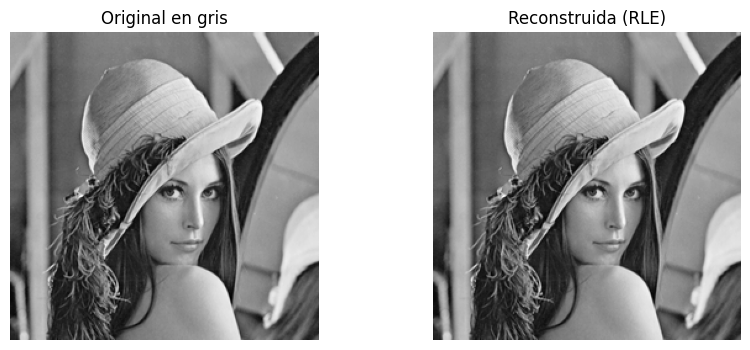


📂 Imagen: ./imagenes/paisaje2.jpg
📏 Dimensiones: (350, 350)
🗜️ Tamaño original (memoria): 122500 píxeles
💾 Tamaño en disco original: 34.88 KB
🗂️ Tamaño comprimido: 114758 pares (valor, cantidad)
📦 Tamaño estimado RLE: 224.14 KB
📊 PSNR entre original y reconstruida: inf dB


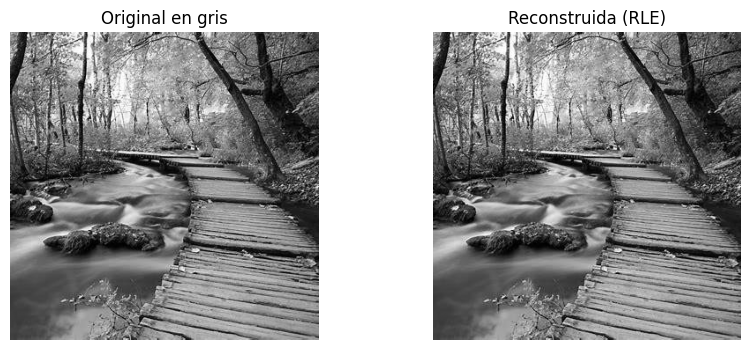


📂 Imagen: ./imagenes/img_color1.png
📏 Dimensiones: (300, 300)
🗜️ Tamaño original (memoria): 90000 píxeles
💾 Tamaño en disco original: 61.48 KB
🗂️ Tamaño comprimido: 14400 pares (valor, cantidad)
📦 Tamaño estimado RLE: 28.12 KB
📊 PSNR entre original y reconstruida: inf dB


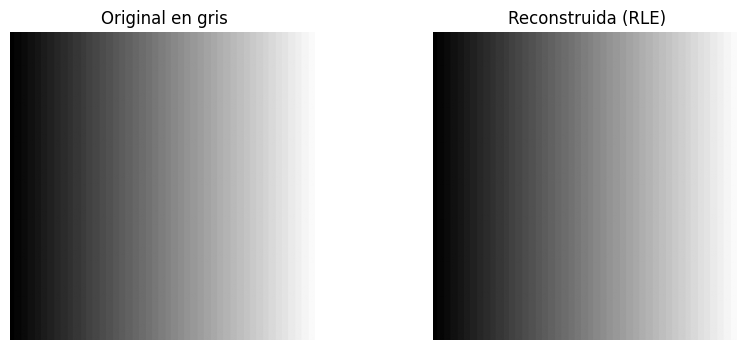

In [13]:
# Función RLE de compresión
def rle_encode(img):
    pixels = img.flatten()
    encoded = []
    count = 1
    for i in range(1, len(pixels)):
        if pixels[i] == pixels[i - 1]:
            count += 1
        else:
            encoded.append((pixels[i - 1], count))
            count = 1
    encoded.append((pixels[-1], count))
    return encoded

# Función RLE de decompresión
def rle_decode(encoded, shape):
    pixels = []
    for value, count in encoded:
        pixels.extend([value] * count)
    return np.array(pixels, dtype=np.uint8).reshape(shape)

# Procesador
def procesar_imagen(path):
    # Cargar imagen y convertir a escala de grises
    original_color = cv2.imread(path)
    original_gray = cv2.cvtColor(original_color, cv2.COLOR_BGR2GRAY)

    # Codificar y decodificar
    comprimida = rle_encode(original_gray)
    reconstruida = rle_decode(comprimida, original_gray.shape)

    # Calcular PSNR
    valor_psnr = psnr(original_gray, reconstruida)

    # Tamaño en disco de la imagen original
    tamano_original_kb = os.path.getsize(path) / 1024

    # Tamaño estimado del archivo comprimido (2 bytes por par)
    tamano_rle_kb = (len(comprimida) * 2) / 1024

    # Mostrar resultados
    print(f"\n📂 Imagen: {path}")
    print(f"📏 Dimensiones: {original_gray.shape}")
    print(f"🗜️ Tamaño original (memoria): {original_gray.size} píxeles")
    print(f"💾 Tamaño en disco original: {tamano_original_kb:.2f} KB")
    print(f"🗂️ Tamaño comprimido: {len(comprimida)} pares (valor, cantidad)")
    print(f"📦 Tamaño estimado RLE: {tamano_rle_kb:.2f} KB")
    print(f"📊 PSNR entre original y reconstruida: {valor_psnr:.2f} dB")

    # Mostrar imágenes
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original en gris')
    plt.imshow(original_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Reconstruida (RLE)')
    plt.imshow(reconstruida, cmap='gray')
    plt.axis('off')

    plt.show()

# Lista de imágenes para procesar
imagenes = [
    './imagenes/Lenna.png',
    './imagenes/paisaje2.jpg',
    './imagenes/img_color1.png'
]

for img_path in imagenes:
    procesar_imagen(img_path)

A partir de la implementación del algoritmo de compresión RLE, se puede observar que su eficacia varía significativamente según las características de la imagen. En el caso de la imagen `img_color1.png`, se logró una reducción considerable del tamaño, pasando de 61.48 KB a un estimado de 28.12 KB, lo que indica que contenía muchas secuencias repetidas de píxeles, haciendo que la compresión sea efectiva. En cambio, las imágenes `Lenna.png` y `paisaje2.jpg` mostraron un comportamiento opuesto: el tamaño estimado tras la compresión fue igual o incluso mayor al tamaño en disco original, debido a la falta de patrones repetitivos evidentes, lo que demuestra que RLE no es adecuado para imágenes con alta variabilidad tonal o detalles complejos.

Por otro lado, el valor de PSNR (infinito) entre la imagen original y la reconstruida en todos los casos confirma que la reconstrucción es perfecta, es decir, no se pierde calidad en el proceso.